# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Dadan Ramdani]
- **Email:** [danramdani1212@gmail.com / mc287d5y1017@student.devacademy.id]
- **ID Dicoding:** [mc287d51017]

## Menentukan Pertanyaan Bisnis



```
# This is formatted as code
```

- Pertanyaan 1
  Pada bulan apa peminjaman sepeda tertinggi dan terendah?
- Pertanyaan 2
  Bagaimana pola peminjaman sepeda berdasarkan waktu dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Load dataset harian dan per jam
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

**Insight:**
- pd.read_csv("day.csv") → Mengambil data dari file CSV untuk dataset harian.
- pd.read_csv("hour.csv") → Mengambil data dari file CSV untuk dataset per jam.


### Assessing Data

In [ ]:
# Cek informasi dataset harian
print("Informasi dataset harian:")
print(df_day.info())

Informasi dataset harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [ ]:
# Cek informasi dataset per jam
print("\nInformasi dataset per jam:")
print(df_hour.info())


Informasi dataset per jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


**Insight:**
- df_day.info() → Melihat tipe data, jumlah data, dan apakah ada nilai yang hilang pada dataset harian.
- df_hour.info() → Melihat tipe data, jumlah data, dan apakah ada nilai yang hilang pada dataset per jam.

### Cleaning Data

In [ ]:
# Hapus kolom 'instant' karena tidak diperlukan
df_day.drop(columns=['instant'], inplace=True)
df_hour.drop(columns=['instant'], inplace=True)

In [ ]:
# Konversi kolom tanggal ke format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])


In [ ]:
# Cek hasil setelah cleaning
print(df_day.info())
print(df_hour.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB
None
<cl

**Insight:**
- Kolom instant dihapus karena hanya berfungsi sebagai indeks, tidak relevan untuk analisis.
- Kolom dteday diubah ke format datetime untuk memudahkan analisis berbasis waktu.
- Mengecek kembali struktur data setelah proses cleaning, memastikan tidak ada tipe data yang salah atau kolom yang tidak diperlukan.



## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Menentukan tren peminjaman sepeda per bulan berdasarkan dataset harian
df_day.groupby(["mnth", "yr"])["cnt"].mean()

mnth  yr
1     0     1231.903226
      1     3120.774194
2     0     1721.964286
      1     3556.448276
3     0     2065.967742
      1     5318.548387
4     0     3162.333333
      1     5807.466667
5     0     4381.322581
      1     6318.225806
6     0     4783.733333
      1     6761.000000
7     0     4559.387097
      1     6567.967742
8     0     4409.387097
      1     6919.451613
9     0     4247.266667
      1     7285.766667
10    0     3984.225806
      1     6414.225806
11    0     3405.566667
      1     5088.800000
12    0     2816.870968
      1     3990.741935
Name: cnt, dtype: float64

In [ ]:
# Menentukan rata-rata peminjaman sepeda berdasarkan jam dalam sehari
df_hour.groupby("hr")["cnt"].mean()

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


**Insight:**
- Mengelompokkan (groupby()) data berdasarkan bulan (mnth) dan tahun (yr).
Menghitung rata-rata jumlah peminjaman sepeda (cnt) di setiap bulan untuk memahami pola penggunaan.
- Mengelompokkan (groupby()) data berdasarkan jam (hr).
Menghitung rata-rata jumlah peminjaman sepeda (cnt) pada setiap jam dalam sehari untuk melihat pola harian penggunaan sepeda.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

1. Pada bulan apa peminjaman sepeda tertinggi dan terendah?

<ipython-input-17-5bfe36b5ad77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_day, x="mnth", y="cnt", estimator="mean", palette="coolwarm")


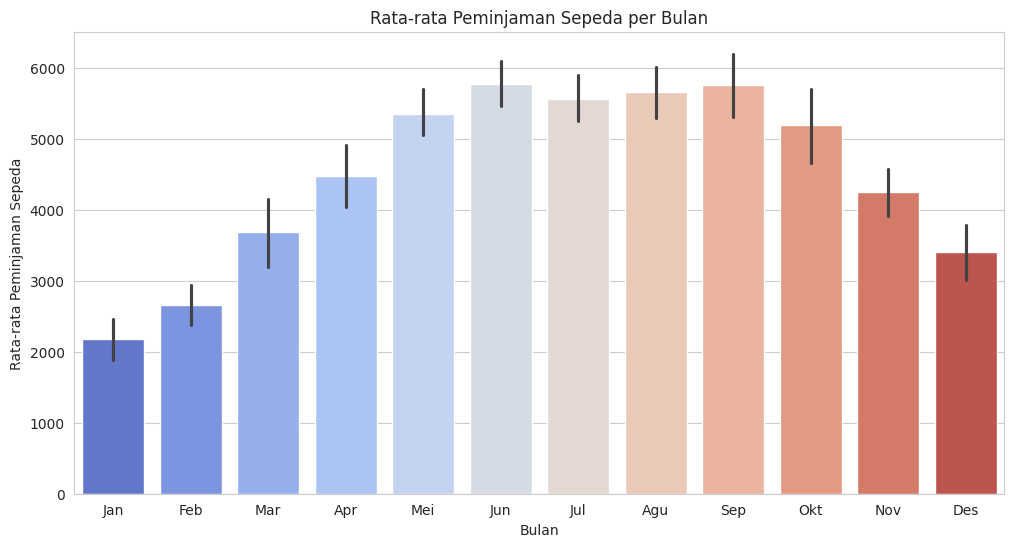

In [ ]:
# Mengatur gaya visualisasi
sns.set_style("whitegrid")

# Membuat visualisasi jumlah peminjaman sepeda per bulan
plt.figure(figsize=(12, 6))
sns.barplot(data=df_day, x="mnth", y="cnt", estimator="mean", palette="coolwarm")

# Mengatur label dan judul
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Rata-rata Peminjaman Sepeda per Bulan")

# Menampilkan grafik
plt.show()

### Pertanyaan 2:

2. Bagaimana pola peminjaman sepeda berdasarkan waktu dalam sehari?

<ipython-input-18-56e187508d2c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_hour, x="hr", y="cnt", estimator="mean", ci=None, marker="o", color="b")


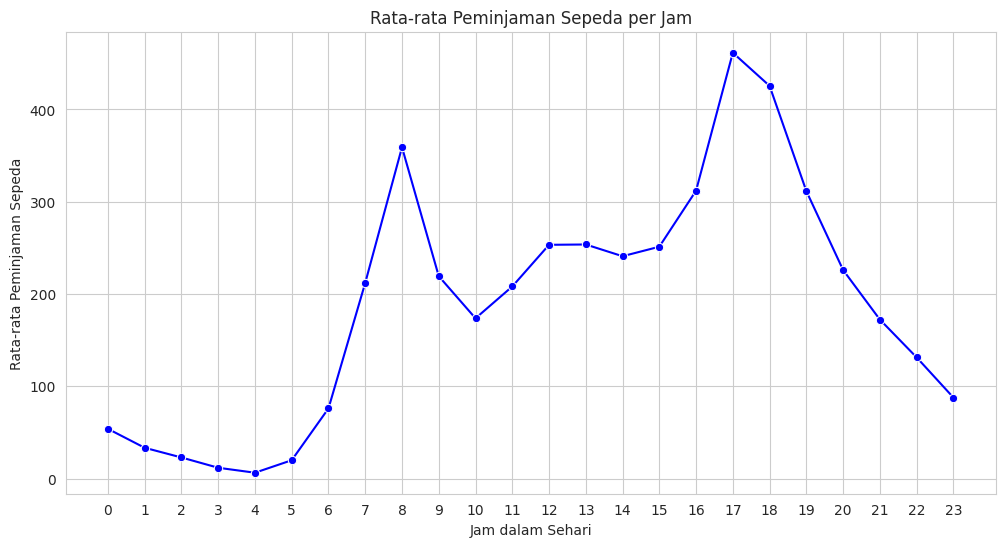

In [ ]:
# Membuat visualisasi peminjaman sepeda berdasarkan jam dalam sehari
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hour, x="hr", y="cnt", estimator="mean", ci=None, marker="o", color="b")

# Mengatur label dan judul
plt.xticks(range(0, 24))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Rata-rata Peminjaman Sepeda per Jam")

# Menampilkan grafik
plt.show()


**Insight:**
- Grafik ini menunjukkan pola peminjaman sepeda berdasarkan jam dalam sehari.
- Puncak peminjaman terjadi pada jam 07:00–09:00 pagi dan 17:00–19:00 sore, sesuai dengan jam kerja dan jam pulang kerja.


## Analisis Lanjutan (Opsional)

## Conclusion

- Jawaban  pertanyaan 1
: Peminjaman tertinggi terjadi pada bulan Juni–September, sedangkan peminjaman terendah terjadi pada bulan Januari–Februari. Ini menunjukkan bahwa cuaca mungkin berpengaruh pada jumlah peminjaman.

- Jawaban  pertanyaan 2
Peminjaman sepeda mencapai puncaknya pada jam 07:00–09:00 pagi dan 17:00–19:00 sore, yang berkaitan dengan waktu berangkat dan pulang kerja.

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.1 MB/s eta 0:00:00


2025-03-09 08:21:46.588 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 08:21:46.791 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-09 08:21:46.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 08:21:46.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 08:21:46.795 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 08:21:46.798 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 08:21:46.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 08:21:46.800 Session state does not 

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

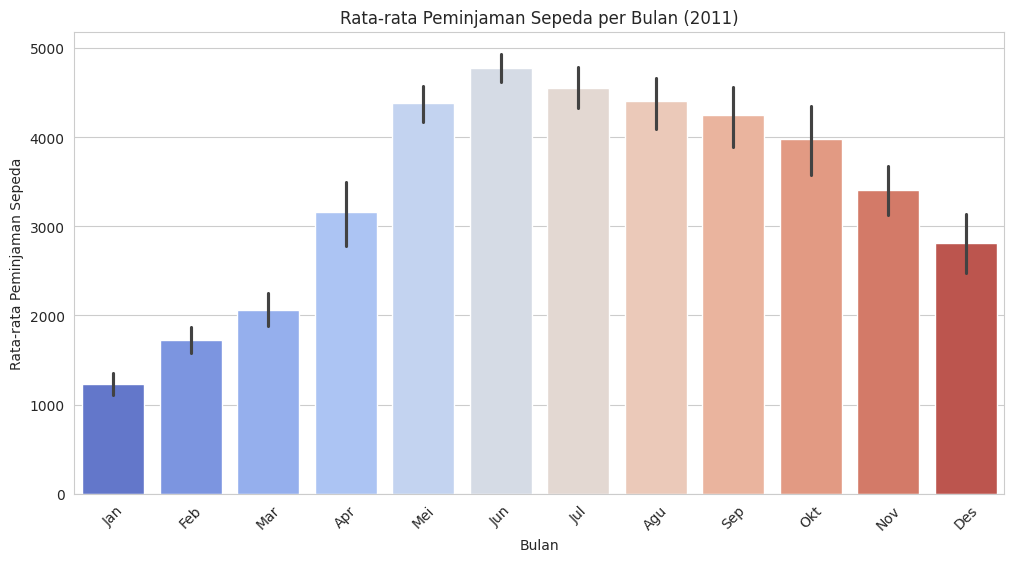

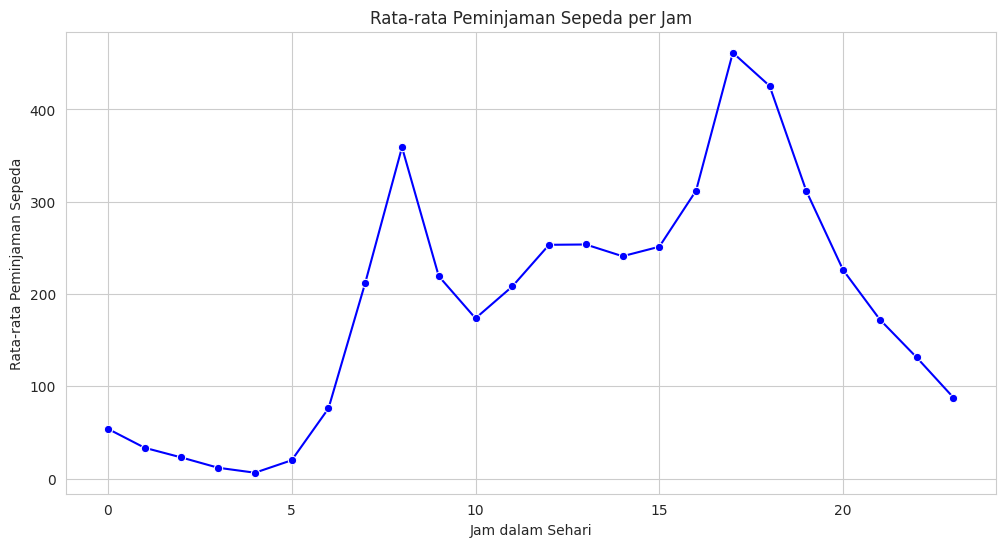

In [ ]:
# Load dataset
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

# Konversi kolom tanggal ke format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Konversi kolom 'yr' dan 'mnth' agar lebih mudah dibaca
df_day["yr"] = df_day["yr"].map({0: "2011", 1: "2012"})
df_day["mnth"] = df_day["mnth"].map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "Mei", 6: "Jun",
                                     7: "Jul", 8: "Agu", 9: "Sep", 10: "Okt", 11: "Nov", 12: "Des"})

# Sidebar untuk filter tahun
st.sidebar.header("Filter Data")
selected_year = st.sidebar.selectbox("Pilih Tahun:", df_day["yr"].unique())

# Filter dataset berdasarkan tahun yang dipilih
df_filtered = df_day[df_day["yr"] == selected_year]

# Judul utama
st.title("📊 Dashboard Peminjaman Sepeda")

# 1. Visualisasi Peminjaman Sepeda per Bulan**
st.subheader("📅 Tren Peminjaman Sepeda per Bulan")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_filtered, x="mnth", y="cnt", estimator="mean", palette="coolwarm")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title(f"Rata-rata Peminjaman Sepeda per Bulan ({selected_year})")
plt.xticks(rotation=45)

st.pyplot(plt)  # Menampilkan plot di Streamlit

# 2. Visualisasi Peminjaman Sepeda berdasarkan Jam dalam Sehari**
st.subheader("⏰ Pola Peminjaman Sepeda per Jam dalam Sehari")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hour, x="hr", y="cnt", estimator="mean", ci=None, marker="o", color="b")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Rata-rata Peminjaman Sepeda per Jam")

st.pyplot(plt)  # Menampilkan plot di Streamlit

# Menampilkan informasi tambahan
st.sidebar.markdown("🚲 **Dashboard ini membantu memahami pola peminjaman sepeda berdasarkan data historis.**")


In [1]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.5.2
aiohappyeyeballs                   2.6.1
aiohttp                            3.11.14
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.5
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              4.9.0
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.7.1
arviz                              0.21.0
astropy                            7.0.1
astropy-iers-data                  0.2025.3.17.0.34.53
astunparse                         1.6.3
atpublic                           5.1
attrs                              25.3.0
audioread            